## Supervised Learning: Classification Problem
The classification goal is to predict the likelihood of a liability customer accepting a personal loan offer.


### ML Pipeline
- Data Collection
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training
- Model Evaluation

### Import The Required Libraries

In [152]:
#Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV


### Function for plotting the confusion_matrix

In [153]:
#Function for the confusion_matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Declined', 'Accepted']); ax.yaxis.set_ticklabels(['Declined', 'Accepted']) 
    plt.show() 

### Data Collection - Load the DataFrame

In [171]:
df = pd.read_csv(r"C:\Users\SiyaB\Desktop\Data Science\Machine Learning\Supervised_Learning\Bank_Personal_Loan_Dataset.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Task 1
- Read the column description and ensure you understand each attribute well

In [172]:
#Checking the dimensions of the data
df.shape

(5000, 14)

- The dataset has 5000 rows and 14 columns.

In [173]:
#Checking for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- There are no missing values in the dataset.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- The dataset 14 columns of which 13 are integers and 1 is a float.

### Task 2
- Study the data distribution in each attribute, share your findings.

In [175]:
#Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- **Age**: The average age customers is about 45 years, with a range of 23 to 67 years.
- **Experience**: has a minimum value of -3 which indicates the results of erroneous data entry.
- **Income**: The average income is $73,774, with a range of $8000 to $224,000. 
- **Family**: The average family size is approximately 2.4, ranging from 1 to 4.
- **CCAvg**: The Average Credit Card monthly spending is about $1,938, with some customers spending $10,000.
- **Education**: Education levels are normaly distributed, with 1(undergrad), 2(graduate), 3(Advanced) fairly represented.
- **Mortgage**: About half of the customers do not have a mortgage, and for those who do, the maximum mortgage value is $635,000.
- **Personal Loan**: Approximately 9.6% of the customers accepted the personal loan.
- **Securities Account, CD Account, Online CreditCard**: These binary features shows different variations in terms of use by customers.



### Handling Erroneous data

In [176]:
#Show the negative experience values
print(df[df['Experience']<0]['Experience'].value_counts())
#The total count and percentage of the erroneous data
print((df[df['Experience']<0]['Experience'].value_counts().sum()/5000 * 100))


Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64
1.04


- The error data entries accounts for 1.04% of the original data, removing the 1% of the data points might affect data quality. Therefore will perform data imputation on the experience attribute.

In [177]:
#Replace the negative values with the positive counterparts values
df.replace({'Experience':[-1]}, 1, inplace=True)
df.replace({'Experience':[-2]}, 2, inplace=True)
df.replace({'Experience':[-3]}, 3, inplace=True)
#summary statistics for experience attribute
df[['Experience']].describe().T

,count,mean,std,min,25%,50%,75%,max
Experience,5000.0,20.1346,11.415189,0.0,10.0,20.0,30.0,43.0


### Visual Data Distribution

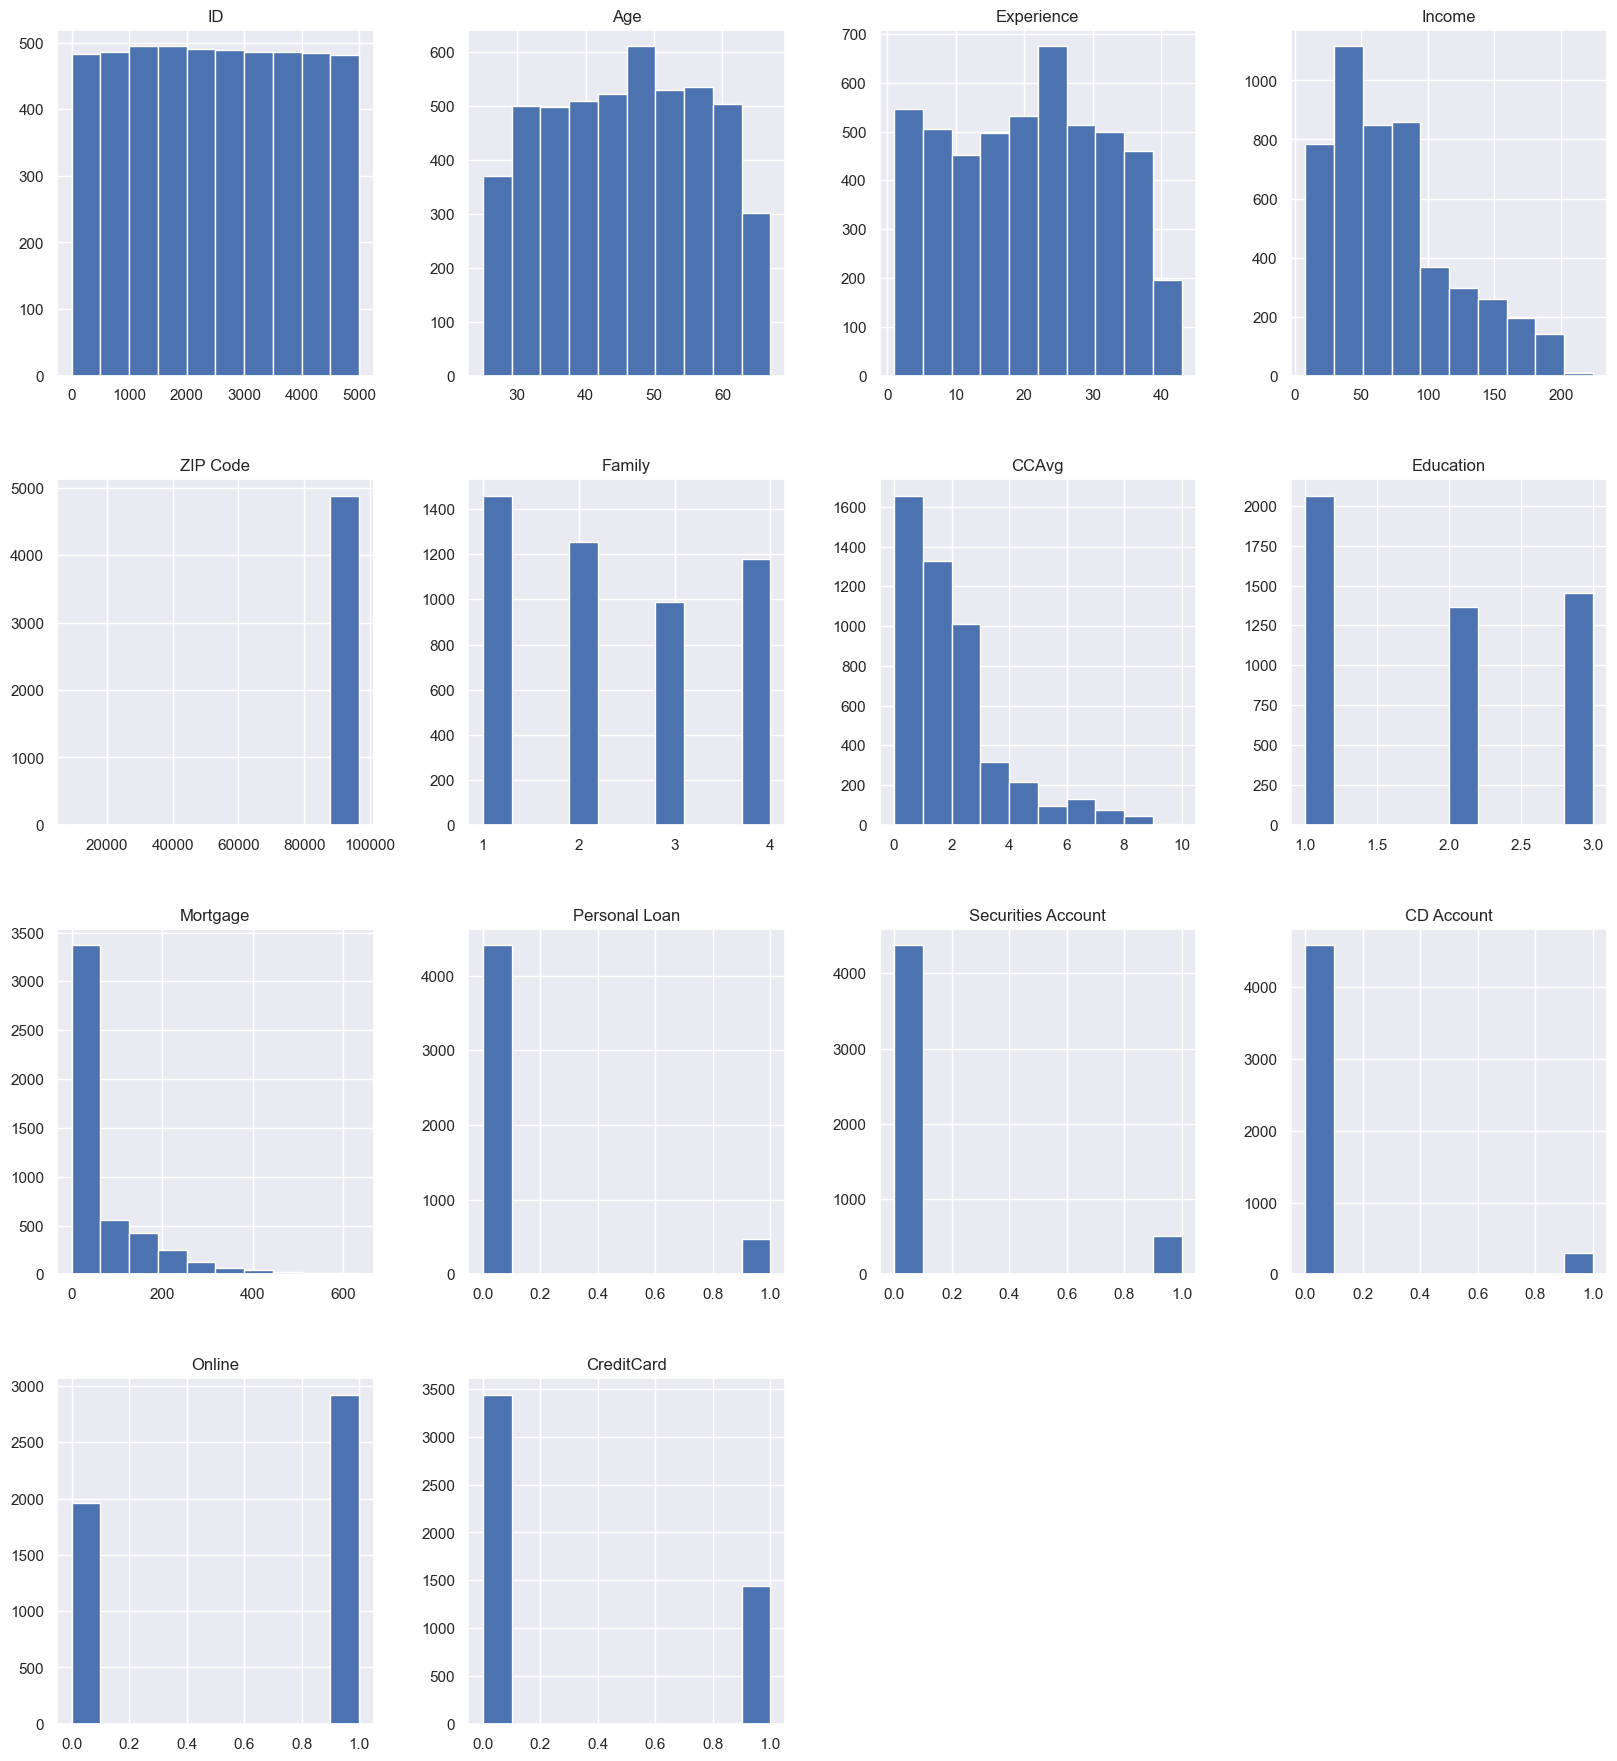

In [163]:
#Visualization distribution using histograms
sns.set()
df.hist(figsize=(20, 22))
plt.show()

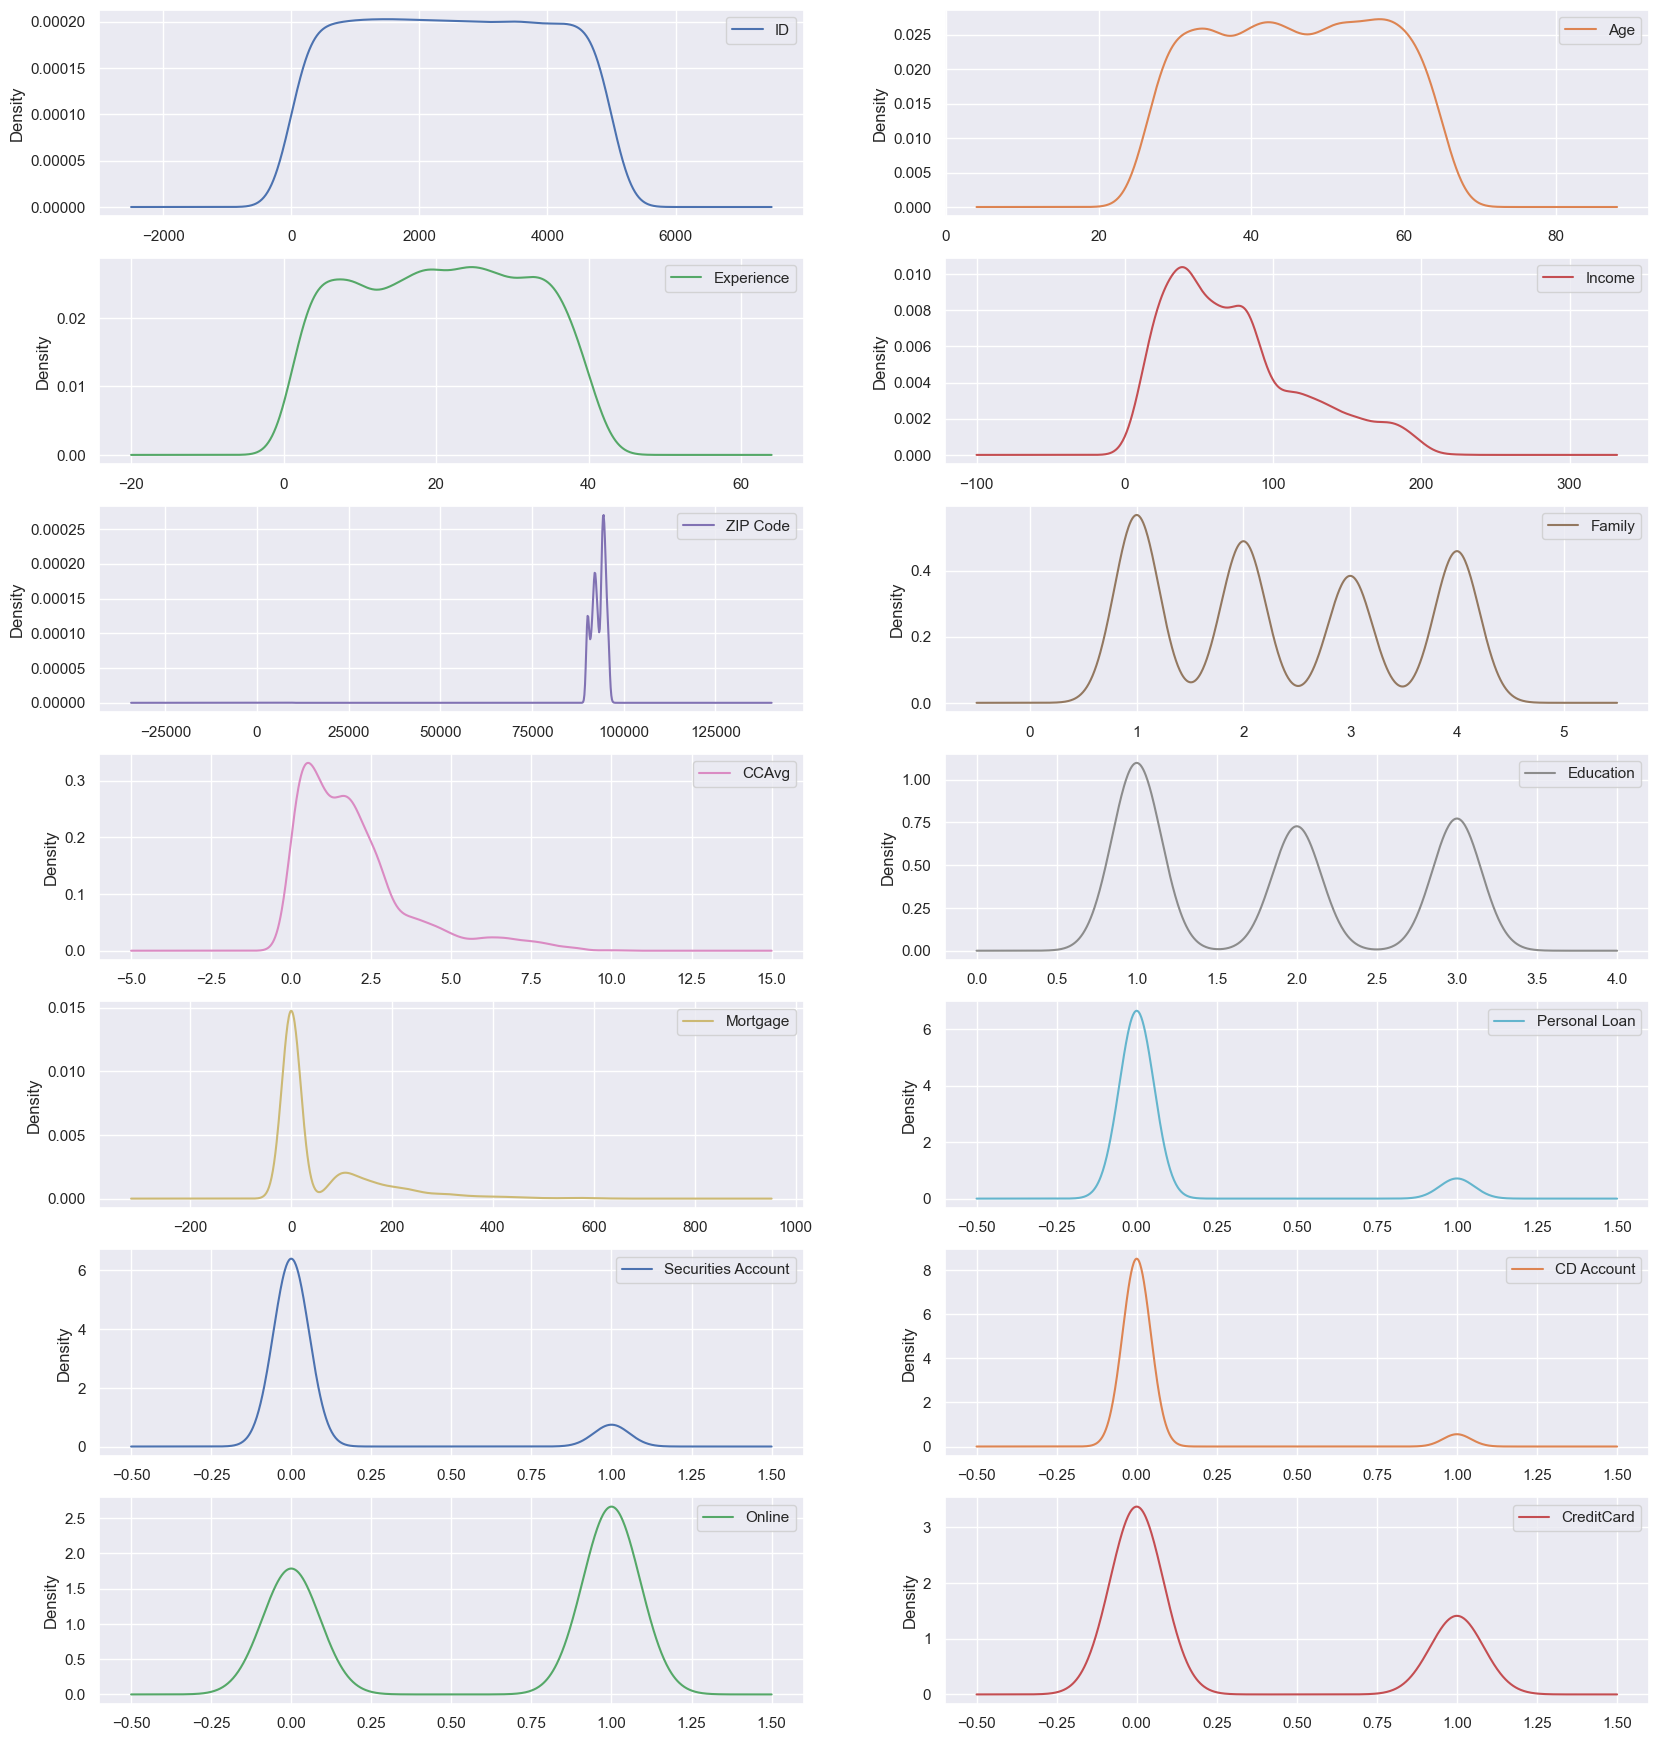

In [164]:
#Visualization distribution using density plots
df.plot(kind='density', subplots=True, sharex=False, layout=(7,2), figsize=(20, 22))
plt.show()

## Data Preparation
- Get the target column distribution. 

In [178]:
#The target column distribution. Our target column is the Personal Loan column
df['Personal Loan'].value_counts()


Personal Loan
0    4520
1     480
Name: count, dtype: int64

- **The distribution of the target column is highly imbalanced. Therefore, we need to perform data preprocessing and balance the dataset.**

In [179]:
#Separate the personal loan column into 'taken'==1 and 'denied'==0.
accepted = df[df['Personal Loan'] == 1]
declined = df[df['Personal Loan'] == 0]

In [180]:
#Show the dimensions of the newly formed datasets
print('Accepted:', accepted.shape, 'Declined:',declined.shape)

Accepted: (480, 14) Declined: (4520, 14)


**Use the Under-Sampling method to create a balanced dataset**
- Build a sample dataset containing similar data distributions to the 'accepted' outcomes.

In [181]:
#Number of declined outcomes (accepted outcomes = 480)
declined_sample = declined.sample(n=480)

#Shoe the dimensions of the denied sample
declined_sample.shape


(480, 14)

- Performing under-sampling helps preserve the integrity of the data, unlike oversampling which might introduce biasness.

In [182]:
#Concatenate the denied_sample data and df_taken data 
new_df = pd.concat([accepted, declined_sample], axis=0)

- Concatenate the delcined_sample data and accepted outcome data to form a new balanced dataset.

In [183]:
#Check the distribution of the target column of the newly formed dataset
new_df['Personal Loan'].value_counts()

Personal Loan
1    480
0    480
Name: count, dtype: int64

- Now that we have a balanced dataset we can move forward to feature engineering.


### Feature Engineering

In [184]:
#Separate the dataset into features and target
X = new_df.drop(['ID', 'Personal Loan'], axis=1)
Y = new_df['Personal Loan']

### Data Standardization
- use <code>StandardScaler</code> to scale the dataset to be in a similar range.

In [185]:
#Perform data standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Check if the data is standardized
if np.std(X)==1.0:
    print("Data has been standardized.")
else:
    print("Data Standardization failed.")

Data has been standardized.


Use <code>train_test_split</code> to separate the data.

In [186]:
#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
#show the dimensions of the dataset compared to the original
print(X.shape, X_train.shape, X_test.shape)

(960, 12) (672, 12) (288, 12)


## Model Building
- Use different classification models (Logistic, K-NN and Naïve Bayes) to predict 
the likelihood of a customer buying personal loans

### Logistic regression

In [187]:
#define the parameters for a logistic regression algorithm
lr_parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [188]:
#Fit the Logistic Regression
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, lr_parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [189]:
print("Tuned hyperparameters: ", logreg_cv.best_params_)
print("Accuracy: ", logreg_cv.best_score_)

Tuned hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.8959174714661984


Calculate the accuracy on the test data uisng the <code>score</code> method.

In [190]:
y_pred = logreg_cv.predict(X_test)
logreg_score = accuracy_score(Y_test, y_pred)
logreg_score

0.9097222222222222

Plot the confusion matrix 

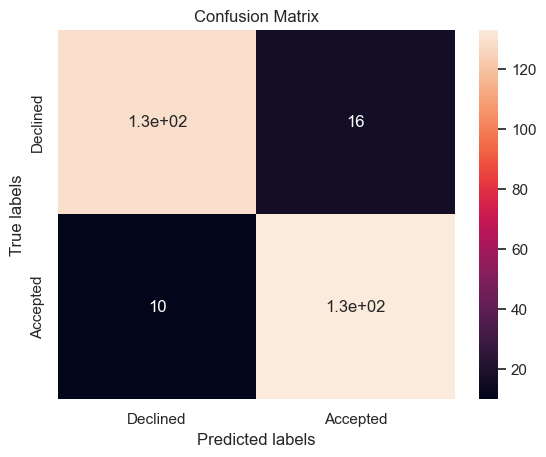

In [191]:
#plotting the confusion matrix
plot_confusion_matrix(Y_test, y_pred)

## Support Vector Machine

In [192]:
svm_parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [193]:
#fit the data on svc
svm = SVC()
svm_cv = GridSearchCV(svm, svm_parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [194]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(31.622776601683793), 'gamma': np.float64(0.03162277660168379), 'kernel': 'rbf'}
accuracy : 0.9270851624231783


Calculate the accuracy on the test data using the method <code>score</code>:

In [195]:
ypred = svm_cv.predict(X_test)
svm_score = accuracy_score(Y_test, ypred)
svm_score

0.9201388888888888

The Plot the Confusion Matrix

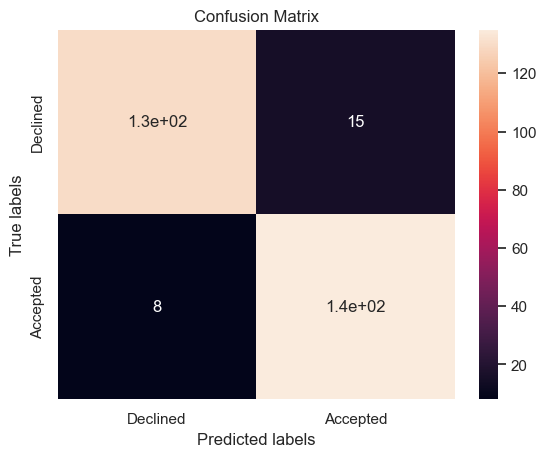

In [196]:
#plotting the confusion matrix
plot_confusion_matrix(Y_test, ypred)

## K-Nearest Neighbors

In [197]:
knn_parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [198]:
#fit the data to the knn algorithm
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, knn_parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [199]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
accuracy : 0.910820895522388


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [200]:
knn_pred = knn_cv.predict(X_test)
knn_score = accuracy_score(Y_test, knn_pred)
knn_score

0.9201388888888888

Plot The Confusion Matrix

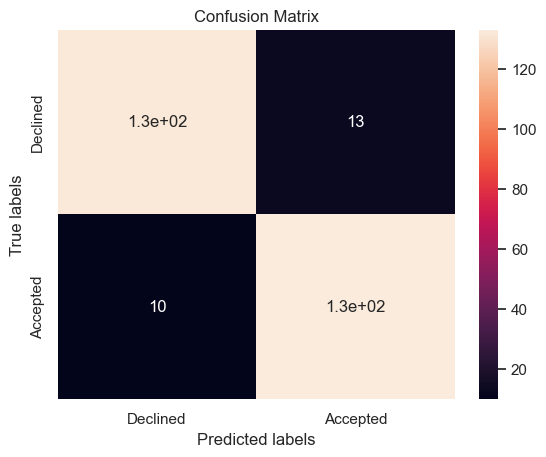

In [201]:
#plotting the confusion matrix
plot_confusion_matrix(Y_test, knn_pred)

## Naive Bayes

### Gaussian Naive Bayes

In [202]:
nb_parameters = {'var_smoothing':[1e-9, 1e-8, 1e-7]}

In [203]:
#fit the naive bayes model
nbayes = GaussianNB()
nbayes_cv = GridSearchCV(nbayes, nb_parameters, cv=10)
nbayes_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]})

In [204]:
print("tuned hpyerparameters :(best parameters) ",nbayes_cv.best_params_)
print("accuracy :",nbayes_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'var_smoothing': 1e-09}
accuracy : 0.814091308165057


In [205]:
nb_pred = nbayes_cv.predict(X_test)
nb_score = accuracy_score(Y_test, nb_pred)
nb_score

0.84375

Plot the confusion matrix

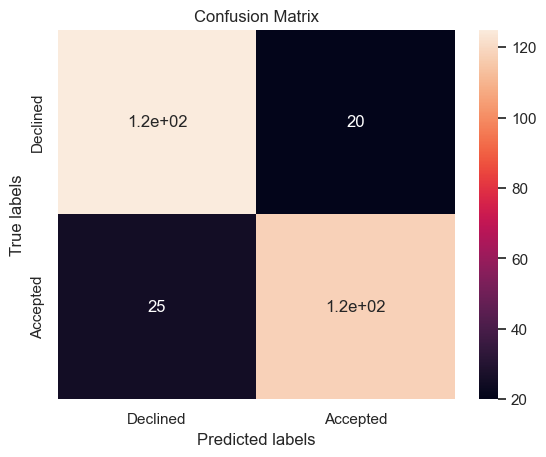

In [206]:
#plotting the confusion matrix for Naive Bayes Theorem
plot_confusion_matrix(Y_test, nb_pred)

## Model Evaluation

- The models were evaluated using the best scores and accuracy scores. Find the table below showing the best results acquired.

In [207]:
#Dict for models, and scores
scores = {'Model':['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes'],
          'Accuracy Score':[logreg_score, svm_score, knn_score, nb_score],
          'Best Score':[logreg_cv.best_score_, svm_cv.best_score_,
                         knn_cv.best_score_, nbayes_cv.best_score_]}
#form a dataframe
results = pd.DataFrame(scores)
results

,Model,Accuracy Score,Best Score
0,Logistic Regression,0.909722,0.895917
1,SVM,0.920139,0.927085
2,KNN,0.920139,0.910821
3,Naive Bayes,0.843750,0.814091


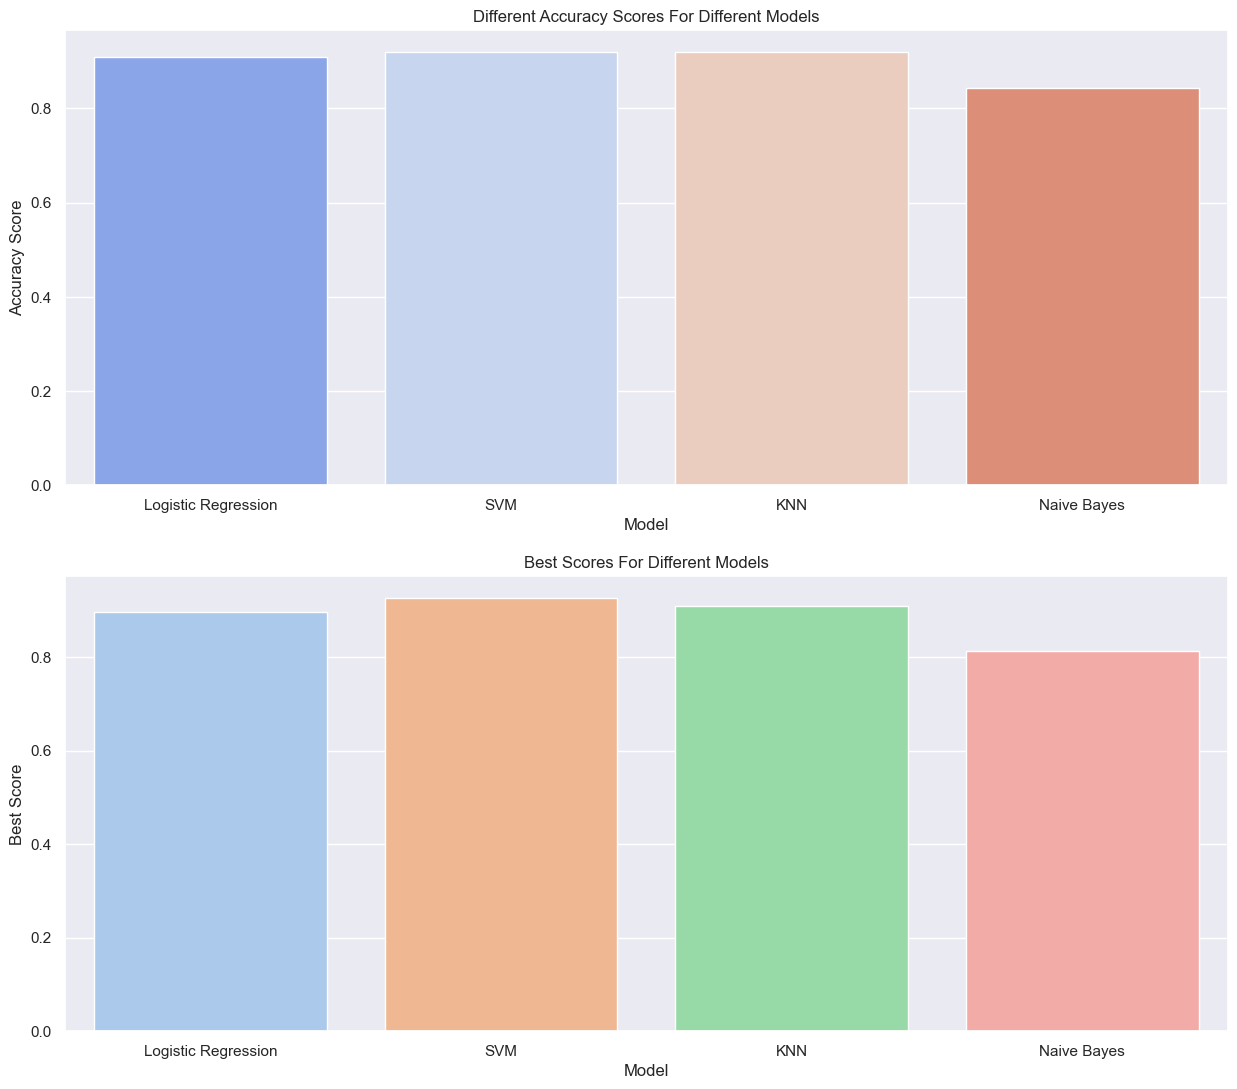

In [208]:
#Visualize the results in a bar charts
plt.figure(figsize=(15, 13))
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='Accuracy Score', hue='Model', data=results, palette='coolwarm')
plt.title("Different Accuracy Scores For Different Models")

plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='Best Score', hue='Model', data=results, palette='pastel')
plt.title("Best Scores For Different Models")

plt.show()

## Conclusion

- From the bar graph we can clearly see that support vector machines has a better prediction with the best accuracy score of about 93%, compared to the other models.
- This is because SVM performs well with small datasets. Therefore this makes it a better choice for predicting personal personal loan acceptance.